In [12]:
from spectral import *
import spectral.io.envi as envi
import numpy as np
from PIL import Image
import pandas as pd

## 讀取envi檔(hdr & img) 

In [2]:
img = envi.open('bhtmref.hdr','bhtmref.img')

## 顯示此張相片的資料

In [3]:
img

	Data Source:   '.\bhtmref.img'
	# Rows:            512
	# Samples:         512
	# Bands:             6
	Interleave:        BSQ
	Quantization:   8 bits
	Data format:     uint8

## 展示此張像片

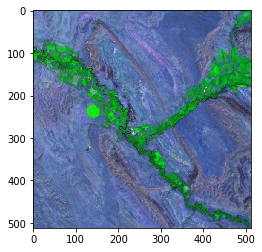

In [6]:
display = imshow(img)

## 後面可加入任意一個三個Band的排列組合


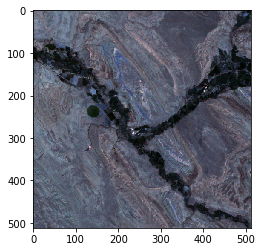

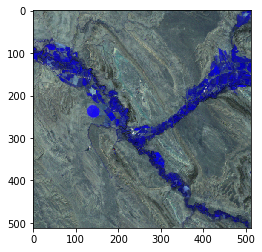

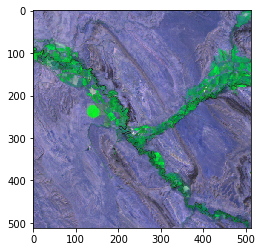

In [11]:
display1 = imshow(img, (0,1,2))
display2 = imshow(img, (1,2,3))
display3 = imshow(img, (2,3,4))

## 顯示此張像片所有Band的影像
## Band1,2,3,4,5,6 = k = 0,1,2,3,4,5

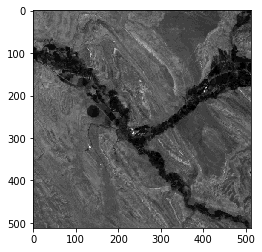

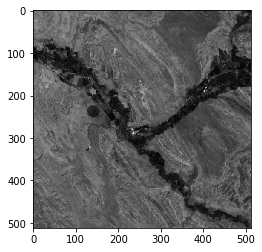

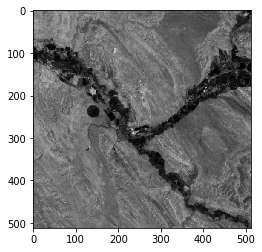

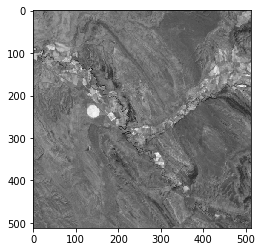

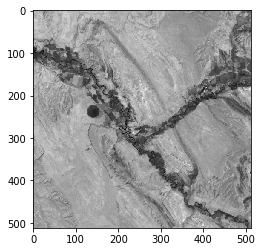

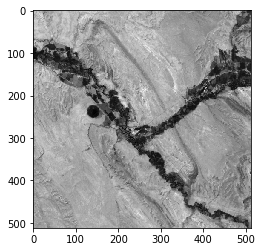

In [27]:
for k in range(6):
    Band = img[:,:,k]
    imshow(Band)

## 將6個Band匯出成6張jpg檔案

In [28]:
a = 0
for k in range(6):
    a = k + 1 
    save_rgb('Band{}.jpg'.format(k), img[:,:,k])

## 讀取某一band的所有value

## 匯出一張RGB分別是Band3,2,1的相片(真實影像樣貌)

In [44]:
save_rgb('TruePicture.jpg', img[:,:,(2,1,0)])

## 讀取此張像片的RGB

In [45]:
img2 = Image.open('TruePicture.jpg')
array_img2 = np.array(img2)
print(array_img2)

[[[127 120 112]
  [129 122 116]
  [130 120 118]
  ...
  [  6   7   0]
  [ 10  16   4]
  [  7  14   0]]

 [[131 118 112]
  [134 118 119]
  [127 110 116]
  ...
  [ 12  15   6]
  [ 13  17   3]
  [ 12  16   2]]

 [[146 125 124]
  [133 110 116]
  [133 110 120]
  ...
  [ 10  16   4]
  [ 13  15   2]
  [ 14  14   4]]

 ...

 [[104  88  75]
  [100  81  75]
  [106  86  85]
  ...
  [ 69  55  55]
  [ 72  56  57]
  [ 87  69  67]]

 [[104  88  73]
  [105  86  79]
  [100  81  77]
  ...
  [ 69  55  55]
  [ 69  55  54]
  [ 74  56  54]]

 [[102  88  75]
  [104  87  79]
  [ 98  78  77]
  ...
  [ 61  47  46]
  [ 61  47  46]
  [ 62  47  42]]]


## 萃取此張相片每個像元之RGB並依[R(i),G(i),B(i),.......] for all i = 1 to 512

In [49]:
img2 = Image.open('TruePicture.jpg')
array_img2 = np.array(img2)
lis = []
for row in range(512):
    lis1 = []
    for column in range(512):
        for j in range(2,-1,-1):
            lis1.append(array_img2[row, column, j])
    lis.append(lis1)
f = open('TruePicture.txt','w')
print('True_Picture:\n',lis,file=f)

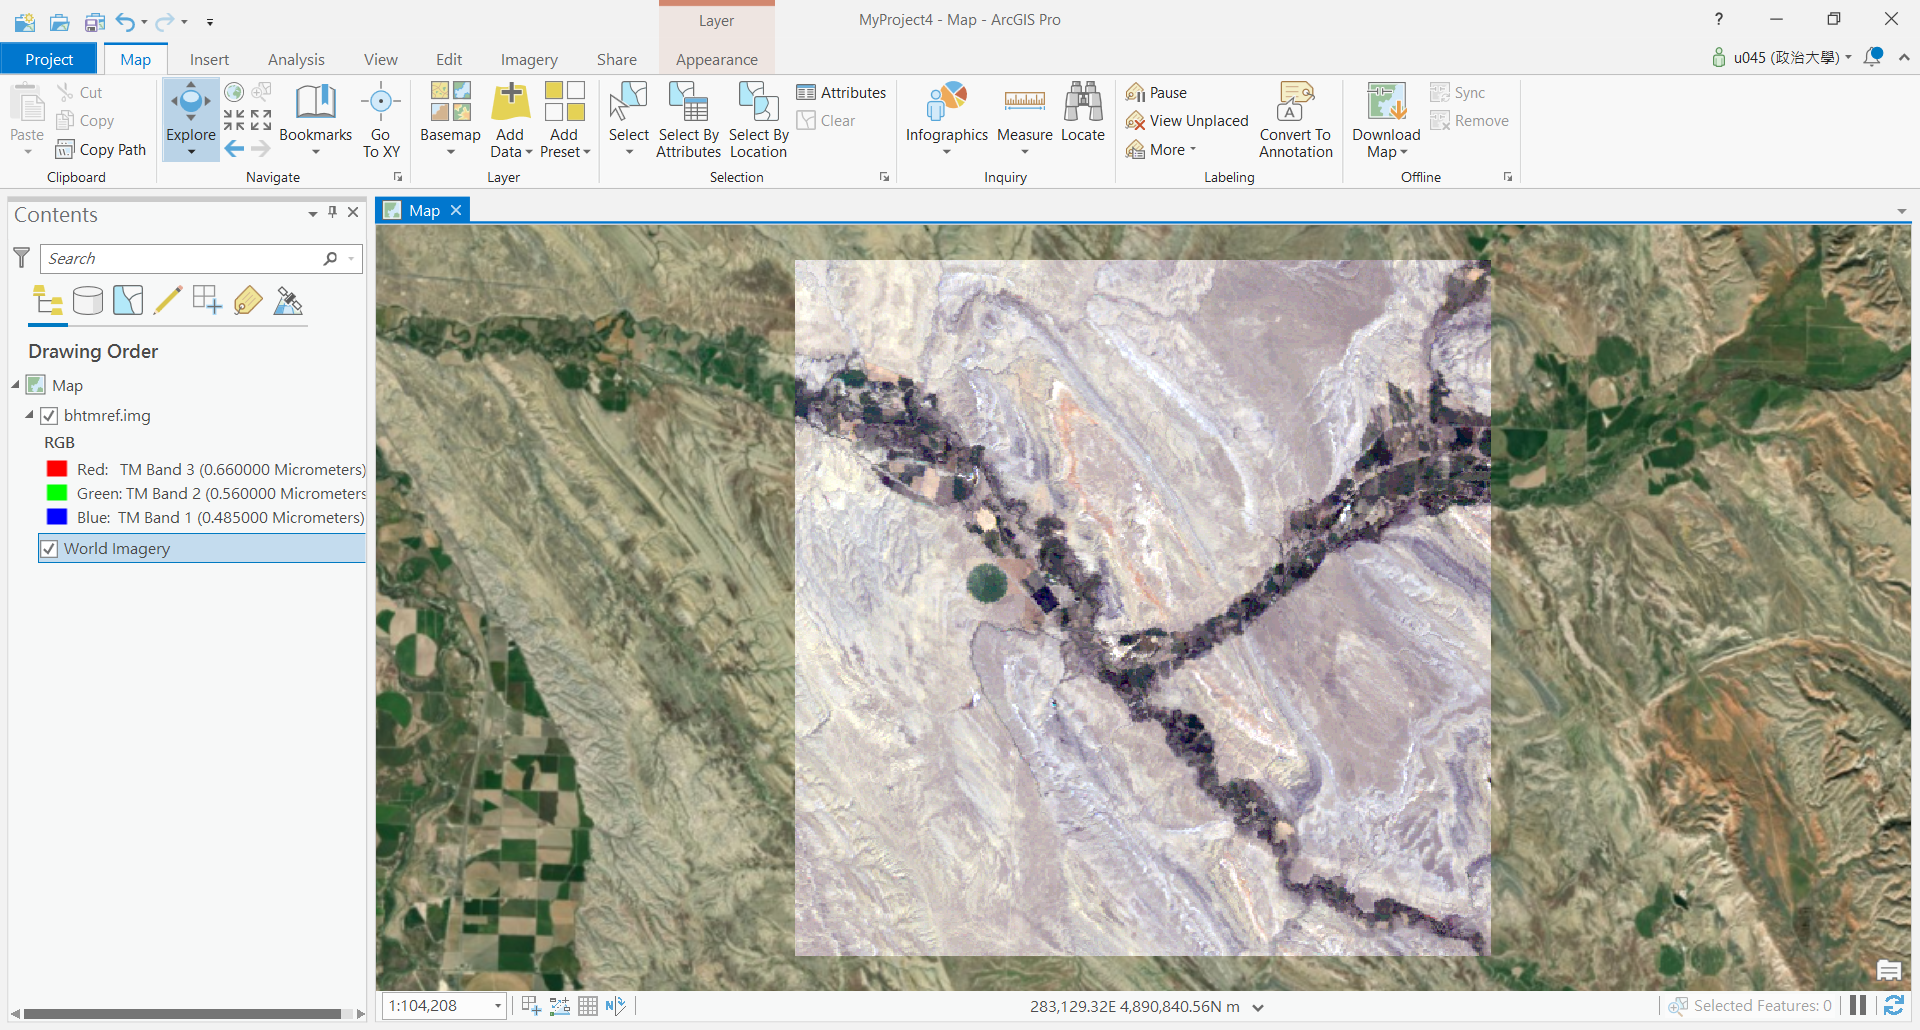

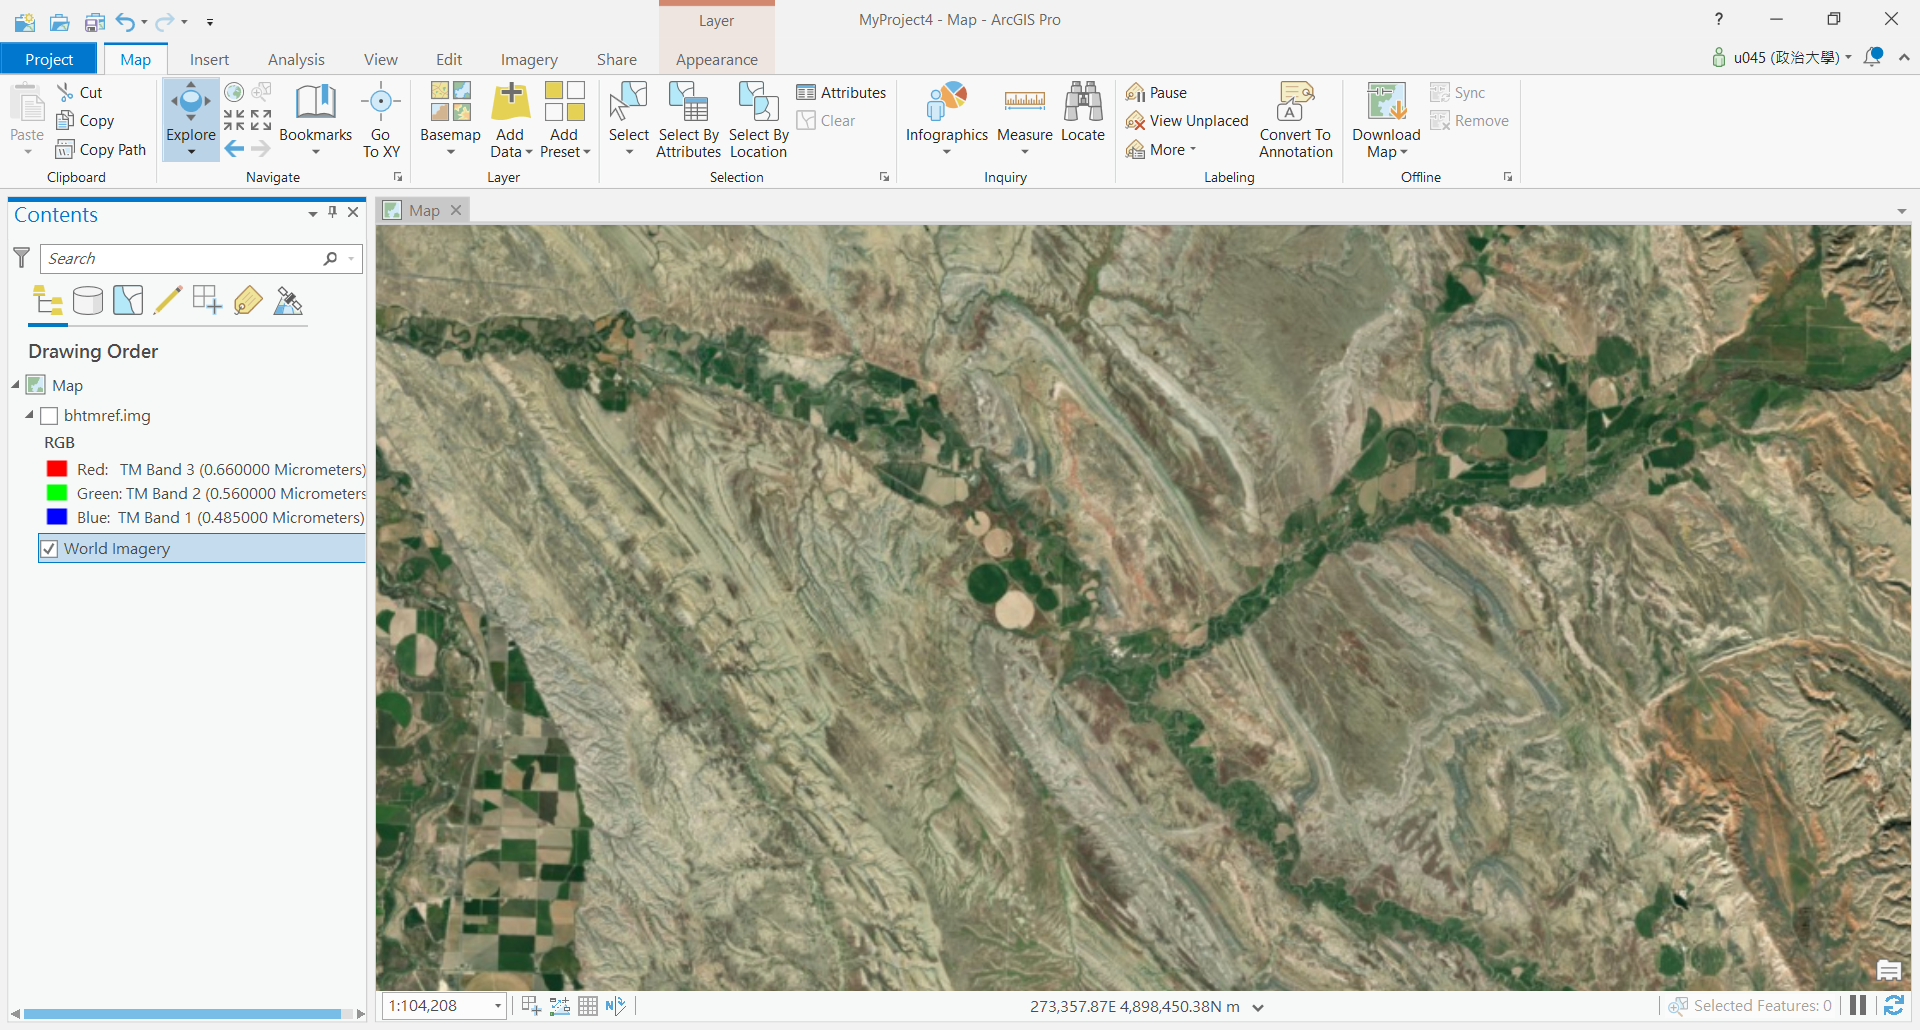